# Python Data Science Process: intro to the stack

At 

## https://dl.dropboxusercontent.com/u/75194/ac297rtut1.ipynb

1. The Data Science Process
2. Something about the Python Data Stack
3. Cleaning the Data and Exploratory Viz
    1. Cleaning
    2. Exploring Globally
    3. Exploring by group
4. Visual Exploration and Separation of Regions
5. Visual Exploration and Separation of the South: the problem with Sicily
6. LDA as an early example of feature engineering.


In [1]:
#!pip install seaborn
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)

In [2]:
from IPython.core.display import Image

You can find some nice Python Stack cheatsheets at https://drive.google.com/folderview?id=0ByIrJAE4KMTtaGhRcXkxNHhmY2M&usp=sharing . I find them useful.

## 1. What is Data Science

In [3]:
Image(url="http://qph.is.quoracdn.net/main-qimg-3504cc03d0a1581096eba9ef97cfd7eb?convert_to_webp=true")

The Ipython Notebook serves as a **Process Notebook** for your research, spanning from your playing around, to your communicating your data. Use Git(hub) to version all the notebooks you create.

## 2. Something about the Python Data Stack

This is just a short introduction. Read the excellent tutorials [here](http://nbviewer.ipython.org/urls/raw.github.com/jrjohansson/scientific-python-lectures/master/Lecture-2-Numpy.ipynb) and [here](http://nbviewer.ipython.org/urls/raw.github.com/jrjohansson/scientific-python-lectures/master/Lecture-4-Matplotlib.ipynb).

###Vectorization: 1 D arrays

The python numerical stack is based on a concept called vectorization. You have seen this in spreadsheets where you manipulate an entire column.

Whats the idea? It is that cpu's have some ability to carry out multiple things at one time, and we should use it to increase speed. But its also something else: there is a simplicity of notation. For example, see the following

In [4]:
a=[1,2,3,4,5]
b=[1,2,3,4,5]
print type(a)
print "============="
for index,aitem in enumerate(a):
    print a[index]*b[index]

<type 'list'>
1
4
9
16
25


vs

In [5]:
a=np.array([1,2,3,4,5])
print type(a)
b=np.array([1,2,3,4,5])

print a*b
print a + 1

<type 'numpy.ndarray'>
[ 1  4  9 16 25]
[2 3 4 5 6]


In [6]:
np.zeros(10)

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [7]:
np.zeros(10, dtype=int)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [8]:
np.ones(10).reshape(5,2)

array([[ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.]])

###Plotting

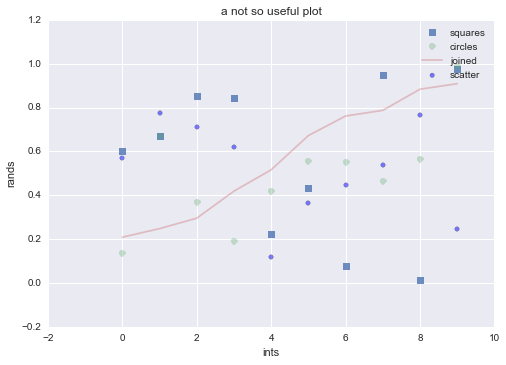

In [9]:
fig=plt.figure()
plt.scatter(xrange(10), np.random.rand(10), alpha=0.5, label="scatter")
plt.plot(xrange(10), np.random.rand(10),'s', alpha=0.8, label="squares")
plt.plot(xrange(10), np.random.rand(10),'o', alpha=0.3, label="circles")
plt.plot(xrange(10), np.sort(np.random.rand(10)), alpha=0.3, label="joined")

axis = fig.gca() #get current axis
axis.set_title('a not so useful plot')
axis.set_xlabel('ints')
axis.set_ylabel('rands')
plt.legend();

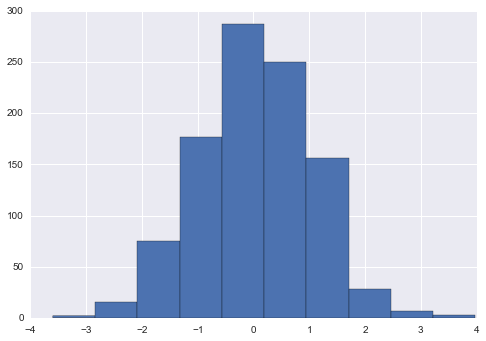

In [10]:
vals=np.random.randn(1000)
plt.hist(vals);

0.0315350070087 0.0315350070087 0.0134674705734


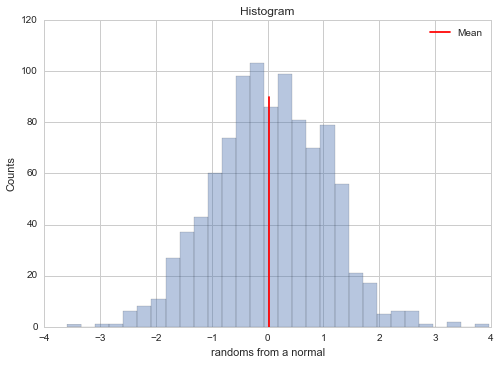

In [11]:
sns.set_context("notebook")
meanval=vals.mean()
print meanval, np.mean(vals), np.median(vals)
with sns.axes_style("whitegrid"):
    plt.hist(vals, bins=30, alpha=0.4);
    plt.axvline(meanval, 0, 0.75, color='r', label='Mean')
    plt.xlabel("randoms from a normal")
    plt.ylabel("Counts")
    plt.title("Histogram")
    plt.legend();

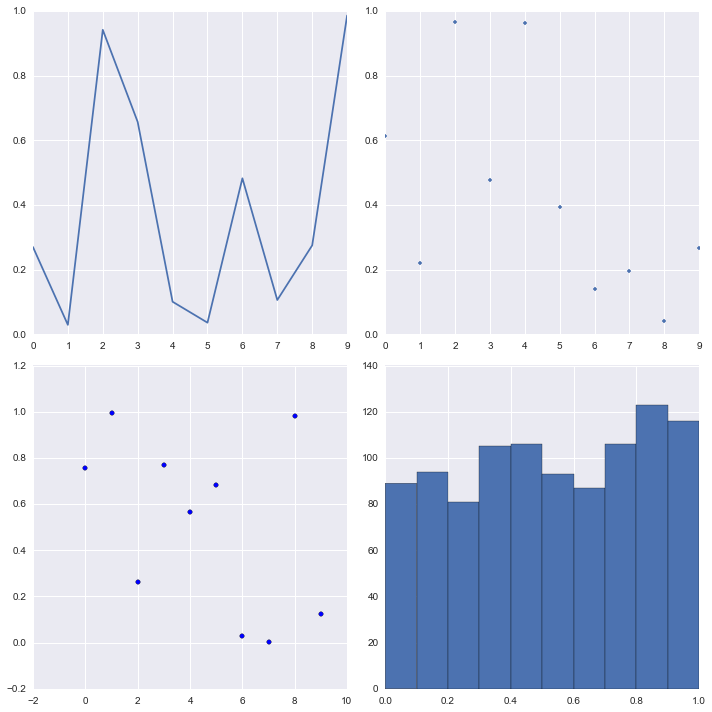

In [12]:
fig, axes=plt.subplots(figsize=(10,10), nrows=2, ncols=2)
axes[0][0].plot(xrange(10), np.random.rand(10))
axes[0][1].plot(xrange(10), np.random.rand(10), '.')
axes[1][0].scatter(xrange(10), np.random.rand(10))
axes[1][1].hist(np.random.rand(1000))
fig.tight_layout()

###Multidimensional Arrays

In [13]:
M = np.array([[1, 2], [3, 4]])
M

array([[1, 2],
       [3, 4]])

In [14]:
M32=np.array([[1,2],[3,4],[5,6]])
print M32
M32.shape

[[1 2]
 [3 4]
 [5 6]]


(3, 2)

In [15]:
M32.T

array([[1, 3, 5],
       [2, 4, 6]])

#### Some simple statistics

(taken from am207, 2014 and 2015)

We use scipy.stats as our library to generate random numbers. For all distributions, the library provides a uniform interface: the function .rvs(p, size=1) to generate random numbers (Random VariateS), and .pmf(x,p) to compute the Probability Mass Function.

In [16]:
import scipy.stats as sp
print sp.bernoulli.rvs(p=0.6, size=10)
sp.bernoulli.pmf([0,1], p=0.7)

[1 0 0 0 1 1 0 1 1 0]


array([ 0.3,  0.7])

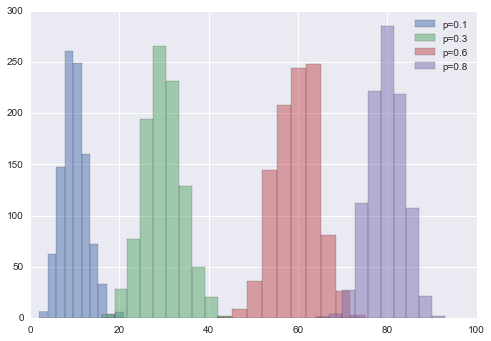

In [17]:
for p in [0.1, 0.3, 0.6, 0.8]:
    rv = sp.binom.rvs(100, p, size=1000)
    plt.hist(rv, alpha=0.5, label='p=' + np.str(p))

plt.legend();

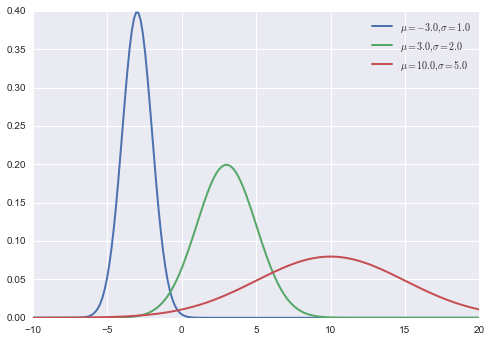

In [18]:
x = np.linspace(-10,20, num=200)

for mu, sigma in zip([-3, 3, 10], [1, 2, 5]):
    plt.plot(x, sp.norm.pdf(x, mu, sigma), lw=2, 
             label = r"$\mu = {0:.1f}, \sigma={1:.1f}$".format(mu, sigma))
    
    
plt.legend();

####In multiple dimensions

In [19]:
df=pd.read_csv("https://dl.dropboxusercontent.com/u/75194/stats/data/01_heights_weights_genders.csv")
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


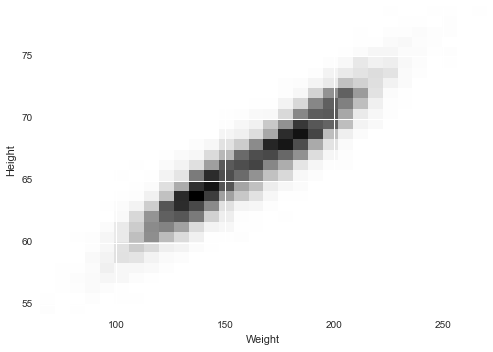

In [20]:
plt.hist2d(df.Weight, df.Height, bins=30)
plt.xlabel("Weight")
plt.ylabel("Height");

2d KDE

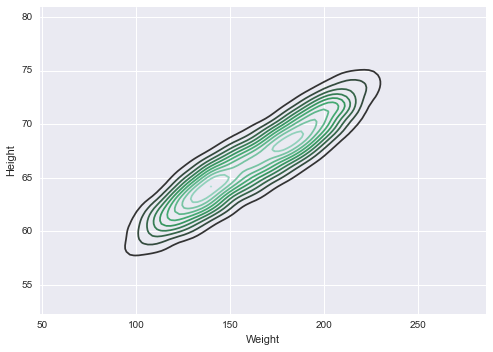

In [21]:
sns.kdeplot(df.Weight, df.Height);

Marginal with kde

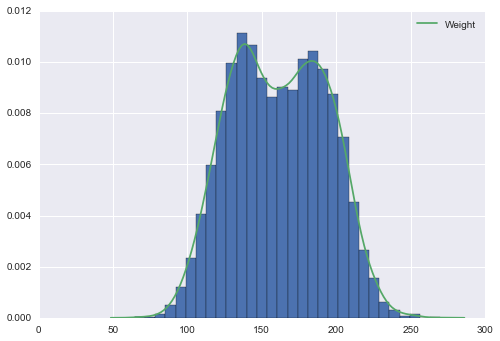

In [22]:
plt.hist(df.Weight, bins=30, normed=True)
sns.kdeplot(df.Weight);

seaborn jointplot

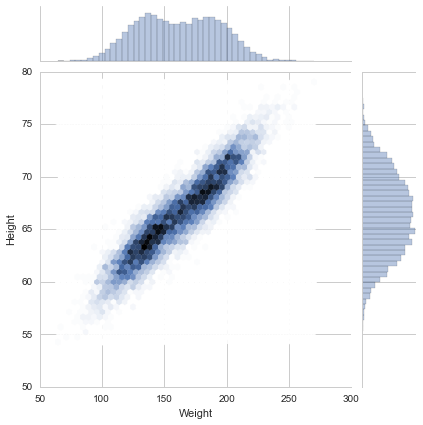

In [23]:
with sns.axes_style("whitegrid"):
    sns.jointplot(df.Weight, df.Height, kind="hex", stat_func=None)

#### 2-D Normal distribution

(200, 200) (200, 200, 2)
[[-1.   -1.   -1.   ..., -1.   -1.   -1.  ]
 [-0.99 -0.99 -0.99 ..., -0.99 -0.99 -0.99]
 [-0.98 -0.98 -0.98 ..., -0.98 -0.98 -0.98]
 ..., 
 [ 0.97  0.97  0.97 ...,  0.97  0.97  0.97]
 [ 0.98  0.98  0.98 ...,  0.98  0.98  0.98]
 [ 0.99  0.99  0.99 ...,  0.99  0.99  0.99]]
(200, 200, 2)
[[[-1.   -1.  ]
  [-1.   -0.99]
  [-1.   -0.98]
  ..., 
  [-1.    0.97]
  [-1.    0.98]
  [-1.    0.99]]

 [[-0.99 -1.  ]
  [-0.99 -0.99]
  [-0.99 -0.98]
  ..., 
  [-0.99  0.97]
  [-0.99  0.98]
  [-0.99  0.99]]

 [[-0.98 -1.  ]
  [-0.98 -0.99]
  [-0.98 -0.98]
  ..., 
  [-0.98  0.97]
  [-0.98  0.98]
  [-0.98  0.99]]

 ..., 
 [[ 0.97 -1.  ]
  [ 0.97 -0.99]
  [ 0.97 -0.98]
  ..., 
  [ 0.97  0.97]
  [ 0.97  0.98]
  [ 0.97  0.99]]

 [[ 0.98 -1.  ]
  [ 0.98 -0.99]
  [ 0.98 -0.98]
  ..., 
  [ 0.98  0.97]
  [ 0.98  0.98]
  [ 0.98  0.99]]

 [[ 0.99 -1.  ]
  [ 0.99 -0.99]
  [ 0.99 -0.98]
  ..., 
  [ 0.99  0.97]
  [ 0.99  0.98]
  [ 0.99  0.99]]]
[[ 0.06610269  0.06693599  0.06776491 ...,  0.

<matplotlib.contour.QuadContourSet instance at 0x10a26b638>

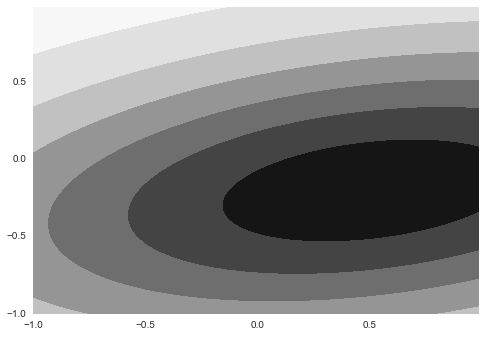

In [24]:
x, y = np.mgrid[-1:1:.01, -1:1:.01]
print x.shape, x.shape+ (2,)
print x
pos = np.empty(x.shape + (2,))
print pos.shape
pos[:, :, 0] = x
pos[:, :, 1] = y
print pos
rv = sp.multivariate_normal([0.5, -0.2], [[2.0, 0.3], [0.3, 0.5]])
#also usable: np.random.multivariate_normal, which then gives rvs
print rv.pdf(pos)
plt.contourf(x, y, rv.pdf(pos))

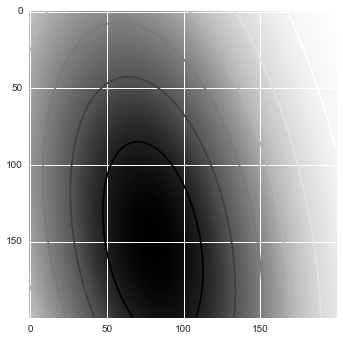

In [25]:
Z=rv.pdf(pos)
plt.imshow(Z)
plt.contour(Z);

In [26]:
mvnrvs=rv.rvs(size=10000)
mvnrvs.shape

(10000, 2)

In [27]:
tmvnrvs=mvnrvs.T

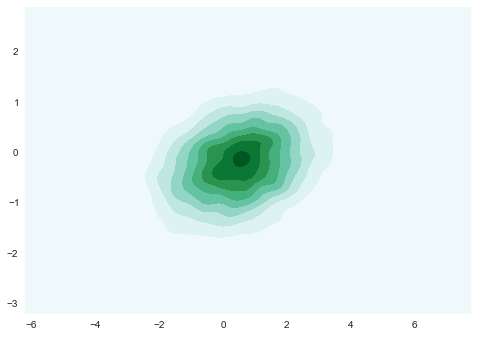

In [28]:
sns.kdeplot(tmvnrvs[0], tmvnrvs[1], shade=True);

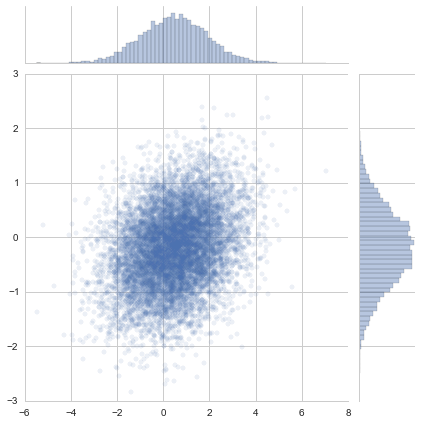

In [29]:
with sns.axes_style("whitegrid"):
    sns.jointplot(tmvnrvs[0], tmvnrvs[1], stat_func=None, joint_kws={'alpha':0.1});

## 3. Cleaning Italian Olives and Exploratory Viz

In [30]:
Image(url="https://dl.dropboxusercontent.com/u/75194/BDF/Italy.png")

I found this data set in the RGGobi book (http://www.ggobi.org/book/), from which the above diagram is taken. It has "the percentage composition of fatty acids
found in the lipid fraction of Italian olive oils', with oils from 3 regions of Italy: the North, the South, and Sardinia. The regions themselves are subdivided into areas as shown in the map above. The source for this data is:

>Forina, M., Armanino, C., Lanteri, S. & Tiscornia, E. (1983), Classification of Olive Oils from their Fatty Acid Composition, in Martens, H. and
Russwurm Jr., H., eds, Food Research and Data Analysis, Applied Science
Publishers, London, pp. 189–214.

From my friend and co-TF for CS109 (see https://github.com/cs109/content) Chris Beaumont, wonderfully expressed in: 

http://nbviewer.ipython.org/github/cs109/content/blob/master/lec_04_wrangling.ipynb

"I'd like to suggest a basic rubric for the early stages of exploratory data analysis in Python. This isn't universally applicable, but it does cover many patterns which recur in several data analysis contexts. It's useful to keep this rubric in mind when encountering a new dataset."

The basic workflow is as follows:

* Build a DataFrame from the data (ideally, put all data in this object)
* Clean the DataFrame. It should have the following properties:
    * Each row describes a single object
    * Each column describes a property of that object
    * Columns are numeric whenever appropriate
    * Columns contain atomic properties that cannot be further decomposed
    
* Explore global properties. Use histograms, scatter plots, and aggregation functions to summarize the data.
* Explore group properties. Use groupby and small multiples to compare subsets of the data.

This process transforms your data into a format which is easier to work with, gives you a basic overview of the data's properties, and likely generates several questions for you to followup in subsequent analysis."

In [31]:
import requests
r=requests.get("https://dl.dropboxusercontent.com/u/75194/BDF/olive.csv")
print r.status_code
with open("local_olive.csv","w") as f:
    f.write(r.text.encode("utf-8"))

200


In [32]:
df=pd.read_csv("local_olive.csv")
df.head(5)

,Unnamed: 0,region,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
0,1.North-Apulia,1,1,1075,75,226,7823,672,36,60,29
1,2.North-Apulia,1,1,1088,73,224,7709,781,31,61,29
2,3.North-Apulia,1,1,911,54,246,8113,549,31,63,29
3,4.North-Apulia,1,1,966,57,240,7952,619,50,78,35
4,5.North-Apulia,1,1,1051,67,259,7771,672,50,80,46


In [33]:
type(df), type(df.region)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [34]:
Image(url="https://dl.dropboxusercontent.com/u/75194/BDF/pandastruct.png")

In [35]:
df.dtypes

Unnamed: 0     object
region          int64
area            int64
palmitic        int64
palmitoleic     int64
stearic         int64
oleic           int64
linoleic        int64
linolenic       int64
arachidic       int64
eicosenoic      int64
dtype: object

We look at the `dtypes` to see if the columns make sense.

### cleaning 

Let's rename that ugly first column. A Google search for 'python pandas dataframe rename' points you at this <a href="http://pandas.pydata.org/pandas-docs/dev/generated/pandas.DataFrame.rename.html">documentation</a>.

In [36]:
print df.columns
df.rename(columns={df.columns[0]:'areastring'}, inplace=True)
df.columns

Index([u'Unnamed: 0', u'region', u'area', u'palmitic', u'palmitoleic', u'stearic', u'oleic', u'linoleic', u'linolenic', u'arachidic', u'eicosenoic'], dtype='object')


Index([u'areastring', u'region', u'area', u'palmitic', u'palmitoleic', u'stearic', u'oleic', u'linoleic', u'linolenic', u'arachidic', u'eicosenoic'], dtype='object')

Let's explore. Which unique regions and areas are contained in the dataset?

In [37]:
print 'regions\t', df.region.unique()
print 'areas\t', df.area.unique()

regions	[1 2 3]
areas	[1 2 3 4 5 6 9 7 8]


In [38]:
pd.value_counts(df.region)

1    323
3    151
2     98
dtype: int64

In [39]:
pd.value_counts(df.area)

3    206
5     65
2     56
9     51
8     50
7     50
4     36
6     33
1     25
dtype: int64

Let's get rid of the junk numbering in `df.areastring`. For single column Pandas Series we use `map`. Here's the <a href="http://pandas.pydata.org/pandas-docs/dev/generated/pandas.Series.map.html">documentation</a>.

In [40]:
df.areastring=df.areastring.map(lambda x: x.split('.')[-1])
df.head()

,areastring,region,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
0,North-Apulia,1,1,1075,75,226,7823,672,36,60,29
1,North-Apulia,1,1,1088,73,224,7709,781,31,61,29
2,North-Apulia,1,1,911,54,246,8113,549,31,63,29
3,North-Apulia,1,1,966,57,240,7952,619,50,78,35
4,North-Apulia,1,1,1051,67,259,7771,672,50,80,46


In [41]:
rkeys=[1,2,3]
rvals=['South','Sardinia','North']
rmap={e[0]:e[1] for e in zip(rkeys,rvals)}
print rmap
df['regionstring']=df.region.map(lambda x: rmap[x])
df.head()

{1: 'South', 2: 'Sardinia', 3: 'North'}


,areastring,region,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic,regionstring
0,North-Apulia,1,1,1075,75,226,7823,672,36,60,29,South
1,North-Apulia,1,1,1088,73,224,7709,781,31,61,29,South
2,North-Apulia,1,1,911,54,246,8113,549,31,63,29,South
3,North-Apulia,1,1,966,57,240,7952,619,50,78,35,South
4,North-Apulia,1,1,1051,67,259,7771,672,50,80,46,South


To access a specific subset of columns of a dataframe, we can use list indexing.

In [42]:
df[['palmitic','oleic']].head()

,palmitic,oleic
0,1075,7823
1,1088,7709
2,911,8113
3,966,7952
4,1051,7771


The above is a DataFrame.

To access the series of entries of a single column, we could do the following.

In [43]:
print df['palmitic']

0     1075
1     1088
2      911
3      966
4     1051
5      911
6      922
7     1100
8     1082
9     1037
10    1051
11    1036
12    1074
13     875
14     952
...
557    1010
558    1020
559    1120
560    1090
561    1100
562    1090
563    1150
564    1110
565    1010
566    1070
567    1280
568    1060
569    1010
570     990
571     960
Name: palmitic, Length: 572, dtype: int64


Remember the acid percentages were `int`s. They need to be renormalized. Lets do this:

In [44]:
acidlist=['palmitic', 'palmitoleic', 'stearic', 'oleic', 'linoleic', 'linolenic', 'arachidic', 'eicosenoic']

#your code here

dfsub=df[acidlist].apply(lambda x: x/100.0)
dfsub.head()

,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
0,10.75,0.75,2.26,78.23,6.72,0.36,0.60,0.29
1,10.88,0.73,2.24,77.09,7.81,0.31,0.61,0.29
2,9.11,0.54,2.46,81.13,5.49,0.31,0.63,0.29
3,9.66,0.57,2.40,79.52,6.19,0.50,0.78,0.35
4,10.51,0.67,2.59,77.71,6.72,0.50,0.80,0.46


Notice that we can replace part of the dataframe by this new frame. Since we need the percentages, let's do this. The `Oleic` percentages should be in the 70s and 80s if you did this right.

In [45]:
df[acidlist]=dfsub
df.head()

,areastring,region,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic,regionstring
0,North-Apulia,1,1,10.75,0.75,2.26,78.23,6.72,0.36,0.60,0.29,South
1,North-Apulia,1,1,10.88,0.73,2.24,77.09,7.81,0.31,0.61,0.29,South
2,North-Apulia,1,1,9.11,0.54,2.46,81.13,5.49,0.31,0.63,0.29,South
3,North-Apulia,1,1,9.66,0.57,2.40,79.52,6.19,0.50,0.78,0.35,South
4,North-Apulia,1,1,10.51,0.67,2.59,77.71,6.72,0.50,0.80,0.46,South


In [46]:
df.to_csv("local-olives-cleaned.csv", index=False)

### exploring globally

In [47]:
pd.crosstab(df.areastring, df.regionstring)

regionstring,North,Sardinia,South
areastring,,,
Calabria,0,0,56
Coast-Sardinia,0,33,0
East-Liguria,50,0,0
Inland-Sardinia,0,65,0
North-Apulia,0,0,25
Sicily,0,0,36
South-Apulia,0,0,206
Umbria,51,0,0
West-Liguria,50,0,0


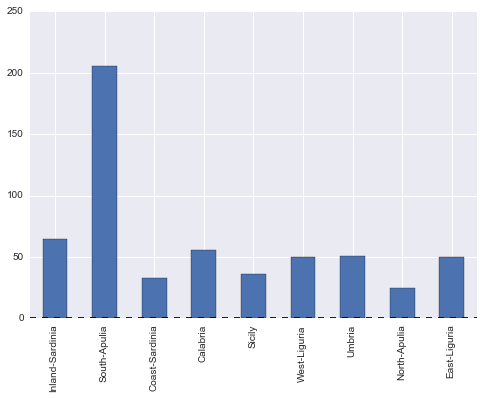

In [48]:
pd.value_counts(df.areastring, sort=False).plot(kind="bar");

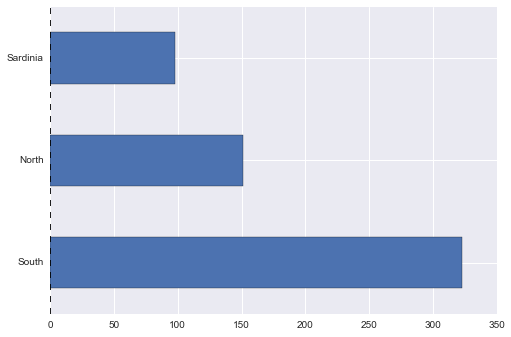

In [49]:
pd.value_counts(df.regionstring, sort=False).plot(kind="barh");

In [50]:
df.describe()

,region,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
count,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000
mean,1.699301,4.599650,12.317413,1.260944,2.288654,73.117483,9.805280,0.318881,0.580979,0.162815
std,0.859968,2.356687,1.685923,0.524944,0.367449,4.058102,2.427992,0.129687,0.220302,0.140833
min,1.000000,1.000000,6.100000,0.150000,1.520000,63.000000,4.480000,0.000000,0.000000,0.010000
25%,1.000000,3.000000,10.950000,0.877500,2.050000,70.000000,7.707500,0.260000,0.500000,0.020000
50%,1.000000,3.000000,12.010000,1.100000,2.230000,73.025000,10.300000,0.330000,0.610000,0.170000
75%,3.000000,7.000000,13.600000,1.692500,2.490000,76.800000,11.807500,0.402500,0.700000,0.280000
max,3.000000,9.000000,17.530000,2.800000,3.750000,84.100000,14.700000,0.740000,1.050000,0.580000


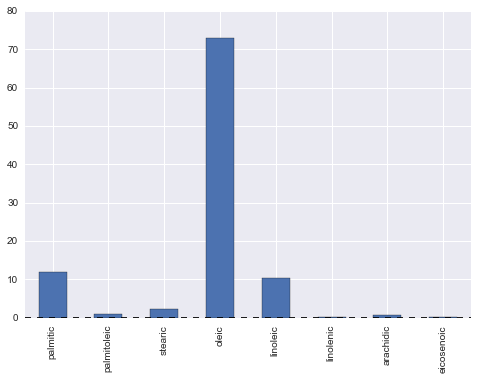

In [51]:
df[acidlist].median().plot(kind="bar");

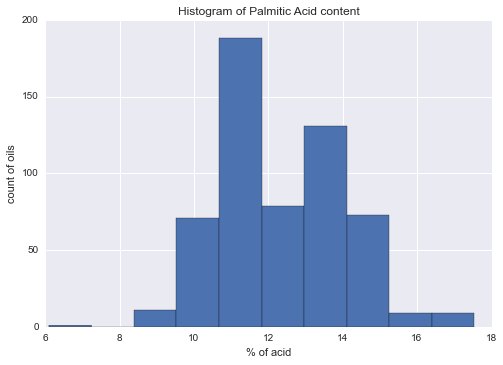

In [52]:
df.palmitic.hist()
plt.xlabel("% of acid")
plt.ylabel("count of oils")
plt.title("Histogram of Palmitic Acid content");

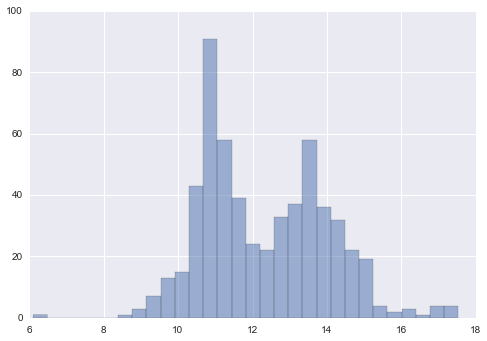

In [53]:
df.palmitic.hist(bins=30, alpha=0.5);

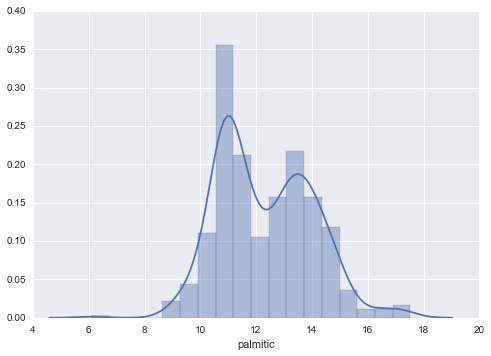

In [54]:
sns.distplot(df.palmitic);

### explore by group

The first concept we deal with here is pandas `groupby`. The idea is to group a dataframe by the values of a particular factor variable. The documentation can be found <a href="http://pandas.pydata.org/pandas-docs/dev/groupby.html">here</a>.

What we do here ia a technique called **Split, Apply, and Combine**.

In [55]:
#split
region_groupby = df.groupby('region')
print type(region_groupby)
region_groupby.head()

<class 'pandas.core.groupby.DataFrameGroupBy'>


,areastring,region,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic,regionstring
0,North-Apulia,1,1,10.75,0.75,2.26,78.23,6.72,0.36,0.60,0.29,South
1,North-Apulia,1,1,10.88,0.73,2.24,77.09,7.81,0.31,0.61,0.29,South
2,North-Apulia,1,1,9.11,0.54,2.46,81.13,5.49,0.31,0.63,0.29,South
3,North-Apulia,1,1,9.66,0.57,2.40,79.52,6.19,0.50,0.78,0.35,South
4,North-Apulia,1,1,10.51,0.67,2.59,77.71,6.72,0.50,0.80,0.46,South
323,Inland-Sardinia,2,5,11.29,1.20,2.22,72.72,11.12,0.43,0.98,0.02,Sardinia
324,Inland-Sardinia,2,5,10.42,1.35,2.10,73.76,11.16,0.35,0.90,0.03,Sardinia
325,Inland-Sardinia,2,5,11.03,0.96,2.10,73.80,10.85,0.32,0.94,0.03,Sardinia
326,Inland-Sardinia,2,5,11.18,0.97,2.21,72.79,11.54,0.35,0.94,0.02,Sardinia
327,Inland-Sardinia,2,5,10.52,0.95,2.15,73.88,11.26,0.31,0.92,0.01,Sardinia


The `groupby` function also acts like an object that can be **mapped**. After the mapping is complete, the rows are put together (**reduced**) into a larger dataframe. For example, using the `describe` function. 

In [56]:
region_groupby.describe()

region        area    palmitic  palmitoleic     stearic       oleic    linoleic   linolenic   arachidic  eicosenoic
region                                                                                                                           
1      count     323  323.000000  323.000000   323.000000  323.000000  323.000000  323.000000  323.000000  323.000000  323.000000
       mean        1    2.783282   13.322879     1.548019    2.287740   71.000093   10.334985    0.380650    0.631176    0.273220
       std         0    0.741054    1.529349     0.507237    0.398709    3.451431    2.106730    0.079727    0.111644    0.083915
       min         1    1.000000    8.750000     0.350000    1.520000   63.000000    4.480000    0.200000    0.320000    0.100000
       25%         1    2.500000   12.680000     1.215000    2.015000   68.830000    8.555000    0.320000    0.560000    0.220000
       50%         1    3.000000   13.460000     1.630000    2.230000   70.300000   10.900000    0.370000    0.620000    0.270000
       75%         1    3.000000   14.190000     1.850000    2.495000   72.835000   12.025000    0.440000    0.690000    0.320000
       max         1    4.000000   17.530000     2.800000    3.750000   81.130000   14.620000    0.740000    1.020000    0.580000
2      count      98   98.000000   98.000000    98.000000   98.000000   98.000000   98.000000   98.000000   98.000000   98.000000
       mean        2    5.336735   11.113469     0.967449    2.261837   72.680204   11.965306    0.270918    0.731735    0.019388
       std         0    0.475023    0.404111     0.138514    0.176363    1.418783    1.072336    0.053844    0.118826    0.007436
       min         2    5.000000   10.300000     0.350000    1.990000   68.820000   10.570000    0.150000    0.450000    0.010000
       25%         2    5.000000   10.852500     0.882500    2.120000   71.372500   11.122500    0.230000    0.660000    0.010000
       50%         2    5.000000   11.075000     0.960000    2.220000   73.255000   11.465000    0.270000    0.720000    0.020000
       75%         2    6.000000   11.372500     1.040000    2.395000   73.810000   13.065000    0.300000    0.810000    0.020000
       max         2    6.000000   12.130000     1.350000    2.720000   74.390000   14.700000    0.430000    1.050000    0.030000
3      count     151  151.000000  151.000000   151.000000  151.000000  151.000000  151.000000  151.000000  151.000000  151.000000
       mean        3    8.006623   10.948013     0.837351    2.308013   77.930530    7.270331    0.217881    0.375762    0.019735
       std         0    0.820542    0.825635     0.264388    0.389560    1.648155    1.431226    0.168865    0.293586    0.007298
       min         3    7.000000    6.100000     0.150000    1.700000   73.400000    5.100000    0.000000    0.000000    0.010000
       25%         3    7.000000   10.600000     0.690000    2.000000   76.800000    6.020000    0.100000    0.100000    0.010000
       50%         3    8.000000   10.900000     0.800000    2.300000   78.000000    6.800000    0.200000    0.380000    0.020000
       75%         3    9.000000   11.250000     1.000000    2.500000   79.500000    8.250000    0.350000    0.595000    0.025000
       max         3    9.000000   14.000000     1.800000    3.500000   84.100000   10.500000    0.700000    1.000000    0.030000

One can do bulk functions on the regional group dataframes or series:

In [57]:
region_groupby.eicosenoic.mean()

region
1         0.273220
2         0.019388
3         0.019735
Name: eicosenoic, dtype: float64

In [58]:
region_groupby.mean()

,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
region,,,,,,,,,
1,2.783282,13.322879,1.548019,2.287740,71.000093,10.334985,0.380650,0.631176,0.273220
2,5.336735,11.113469,0.967449,2.261837,72.680204,11.965306,0.270918,0.731735,0.019388
3,8.006623,10.948013,0.837351,2.308013,77.930530,7.270331,0.217881,0.375762,0.019735


Or one can use `aggregate` to pass an arbitrary function of to the sub-dataframe. The function is applied columnwise.

In [59]:
dfbymean=df.groupby("regionstring").aggregate(np.mean)
dfbymean.head()

,region,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
regionstring,,,,,,,,,,
North,3,8.006623,10.948013,0.837351,2.308013,77.930530,7.270331,0.217881,0.375762,0.019735
Sardinia,2,5.336735,11.113469,0.967449,2.261837,72.680204,11.965306,0.270918,0.731735,0.019388
South,1,2.783282,13.322879,1.548019,2.287740,71.000093,10.334985,0.380650,0.631176,0.273220


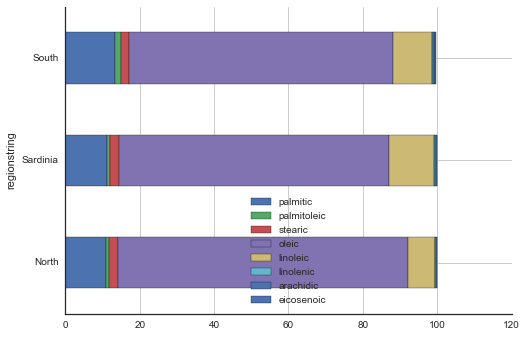

In [60]:
with sns.axes_style("white", {'grid':False}):
    dfbymean[acidlist].plot(kind='barh', stacked=True);
    sns.despine()

Or one can use `apply` to pass an arbitrary function to the sub-dataframe. This one takes the dataframe as argument.

In [61]:
region_groupby.apply(lambda f: f.palmitic.mean())

region
1         13.322879
2         11.113469
3         10.948013
dtype: float64

## 4. Figuring the dataset by Region

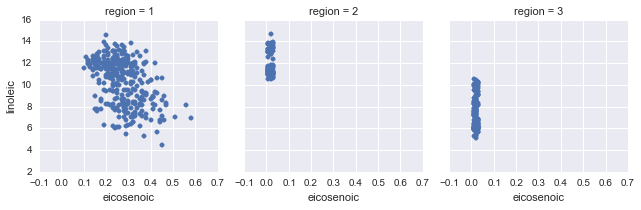

In [62]:
g=sns.FacetGrid(df, col="region")
g.map(plt.scatter,"eicosenoic", "linoleic");

Clearly, region 1 or the South can visually be separated out by `eicosenoic` fraction itself.

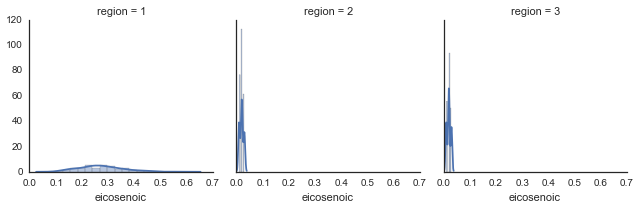

In [63]:
with sns.axes_style("white"):
    g=sns.FacetGrid(df, col="region")
    g.map(sns.distplot, "eicosenoic")

We make a SPLOM using `seaborn` to see in what space the regions may be separated. Note that linoleic and oleic seem promising. And perhaps arachidic paired with eicosenoic.

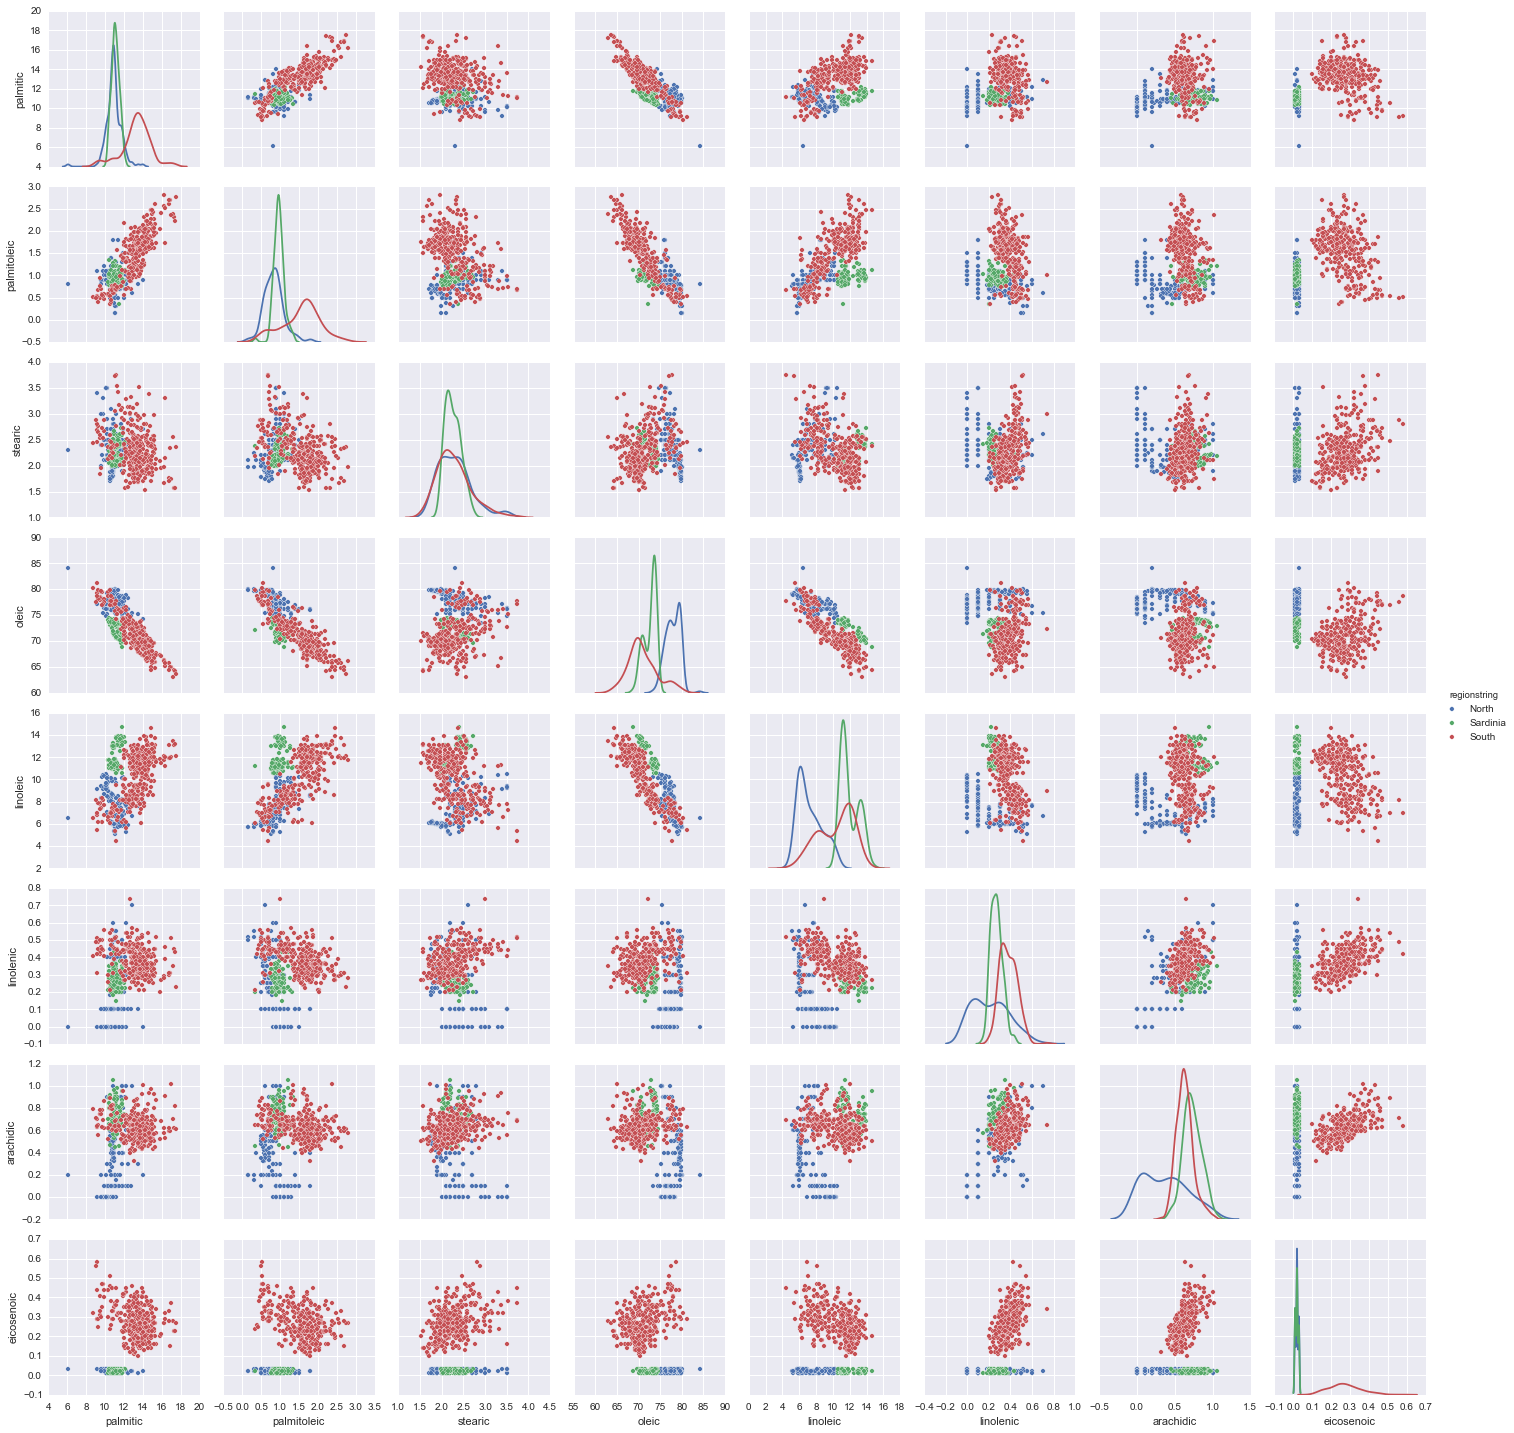

In [64]:
sns.pairplot(df, vars=acidlist, hue="regionstring", size=2.5, diag_kind='kde');

Pandas supports conditional indexing: <a href="http://pandas.pydata.org/pandas-docs/dev/indexing.html#boolean-indexing">documentation</a>. Lets use it to follow up on the clear pattern of Southern oils seeeming to be separable by just the `eicosenoic` feature.

In [65]:
loweico=df[df.eicosenoic < 0.02]
pd.crosstab(loweico.areastring, loweico.regionstring)

regionstring,North,Sardinia
areastring,,
Coast-Sardinia,0,11
East-Liguria,17,0
Inland-Sardinia,0,19
Umbria,14,0
West-Liguria,11,0


**Indeed this is the case!** Can also be seen using parallel co-ordinates:

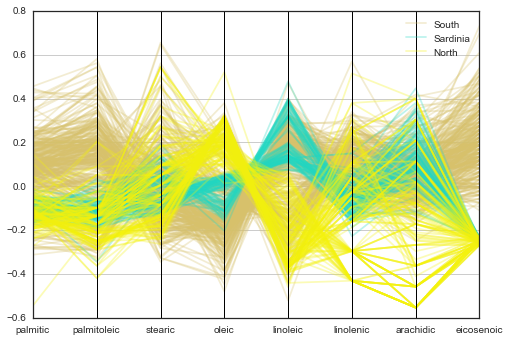

In [66]:
from pandas.tools.plotting import parallel_coordinates
dfna=df[acidlist]
#normalizing by range
dfna_norm = (dfna - dfna.mean()) / (dfna.max() - dfna.min())
with sns.axes_style("white"):
    parallel_coordinates(df[['regionstring']].join(dfna_norm), 'regionstring', alpha=0.3)

## 5. Figuring the South of Italy by Area

In [67]:
dfsouth=df[df.regionstring=='South']
dfsouth.head()

,areastring,region,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic,regionstring
0,North-Apulia,1,1,10.75,0.75,2.26,78.23,6.72,0.36,0.60,0.29,South
1,North-Apulia,1,1,10.88,0.73,2.24,77.09,7.81,0.31,0.61,0.29,South
2,North-Apulia,1,1,9.11,0.54,2.46,81.13,5.49,0.31,0.63,0.29,South
3,North-Apulia,1,1,9.66,0.57,2.40,79.52,6.19,0.50,0.78,0.35,South
4,North-Apulia,1,1,10.51,0.67,2.59,77.71,6.72,0.50,0.80,0.46,South


We make a couple of SPLOM's, one with sicily and one without sicily, to see whats separable. Sicily seems to be a problem. As before, see the KDE's first to see if separability exists and then let the eye look for patterns.

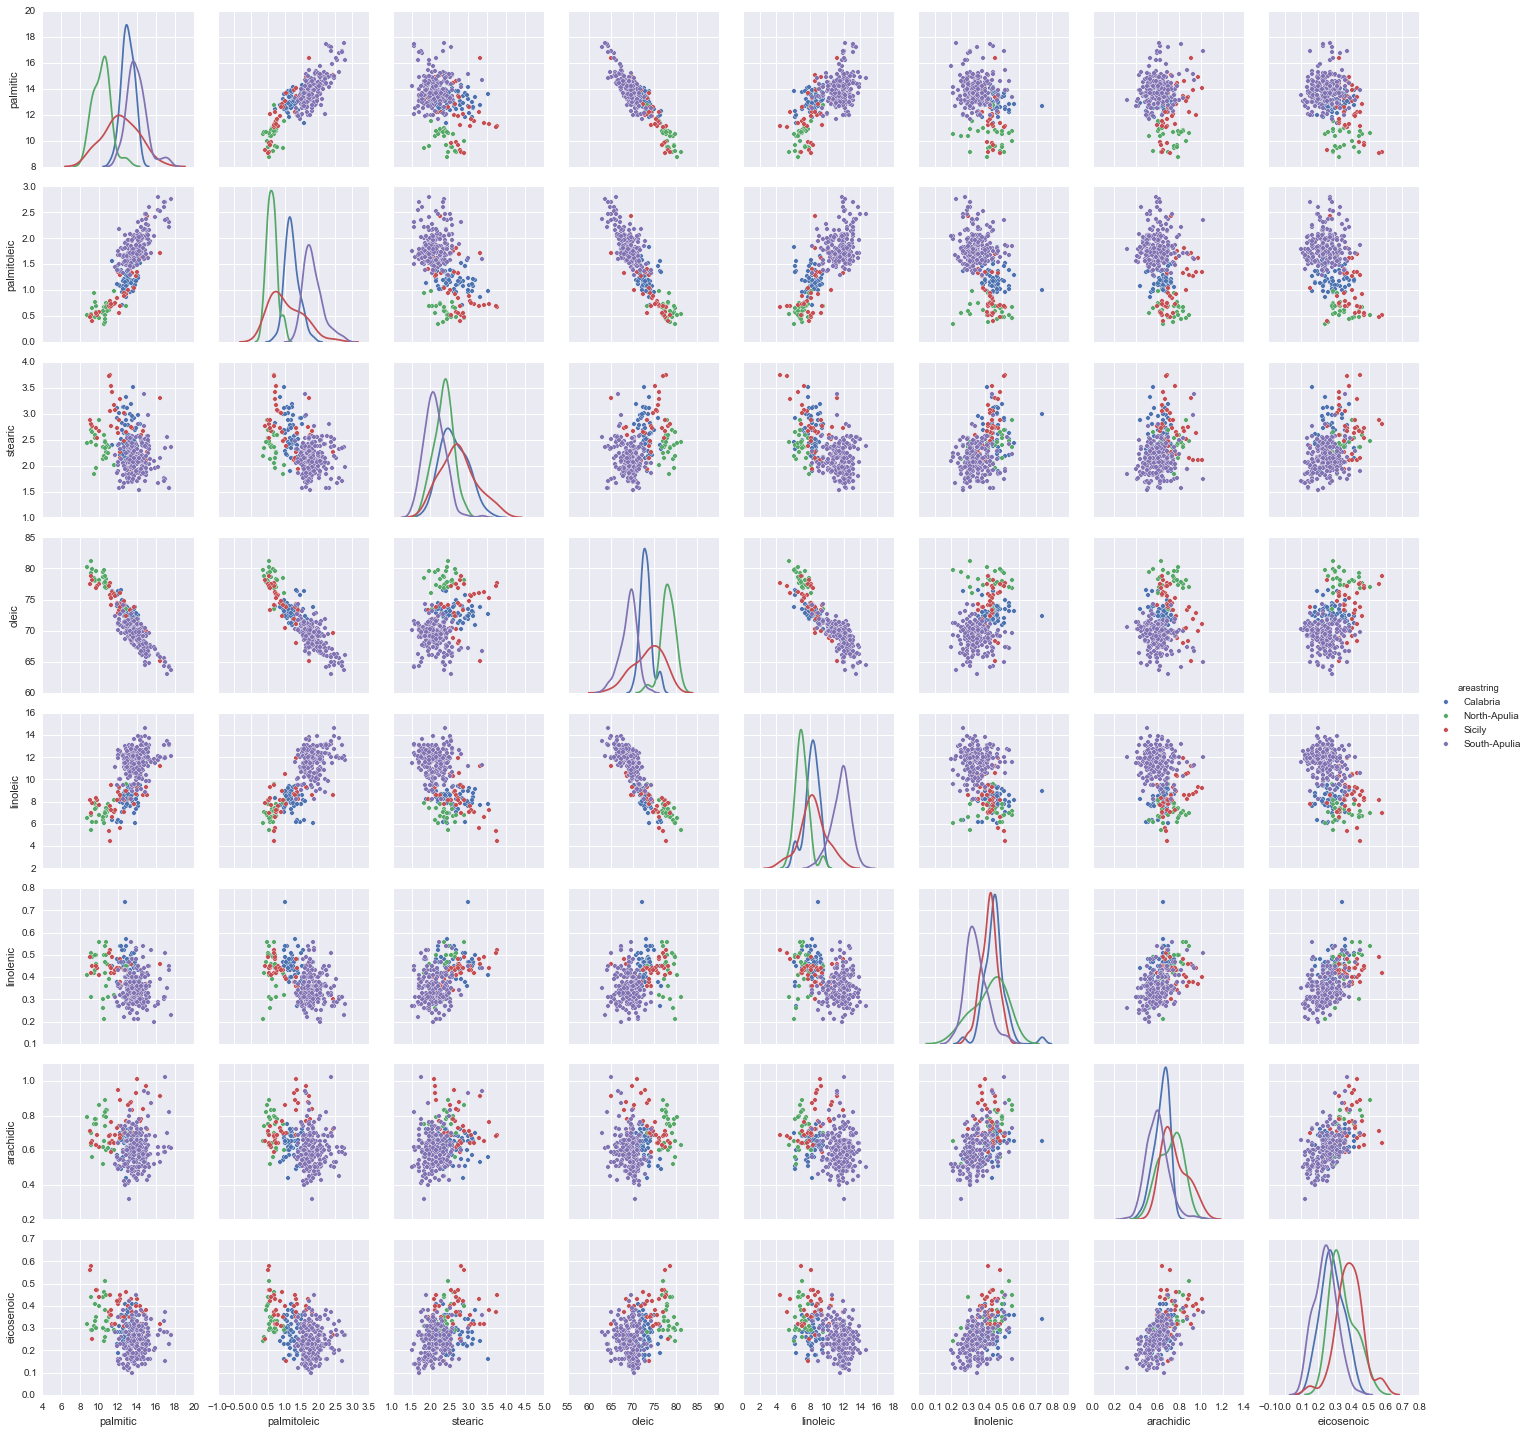

In [68]:
sns.pairplot(dfsouth, hue="areastring", size=2.5, vars=acidlist, diag_kind='kde');

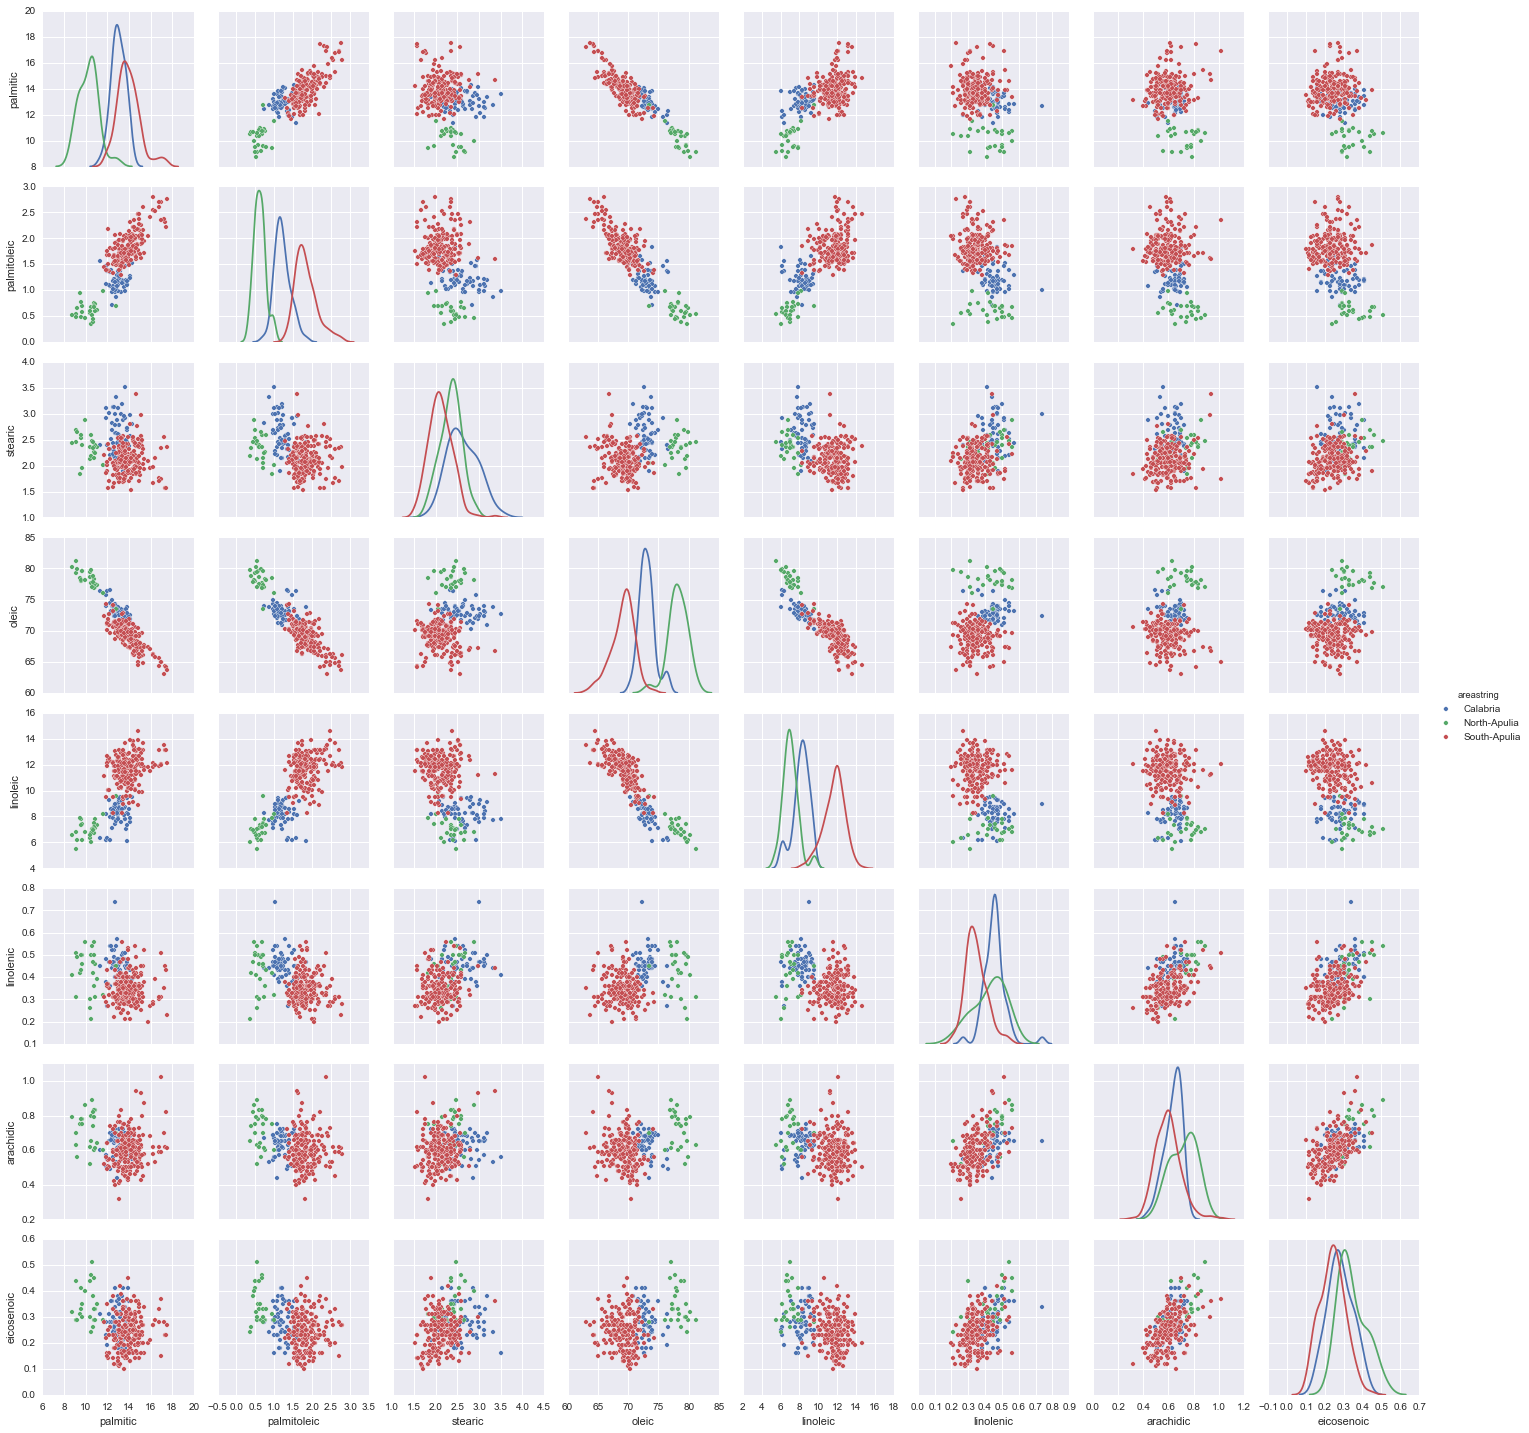

In [69]:
sns.pairplot(dfsouth[dfsouth.areastring!="Sicily"], hue="areastring", size=2.5, vars=acidlist, diag_kind='kde');

Seems that combinations of oleic, palmitic, palmitoleic might be useful?

## 7. Dimensional reduction, and the creation of features.

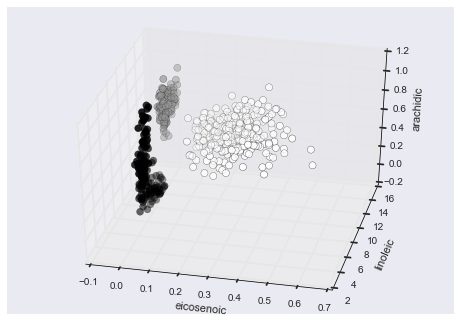

In [70]:
#some code taken from https://github.com/jakevdp/ESAC-stats-2014
from IPython.html.widgets import interact
from mpl_toolkits import mplot3d

def plot_3D(X, y, z, elev=30, azim=30):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], z, c=y, s=50)
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('eicosenoic')
    ax.set_ylabel('linoleic')
    ax.set_zlabel('arachidic')

#set azim to -77, elev to 24
def plotter(elev, azim):
    return plot_3D(df[['eicosenoic', 'linoleic']].values, df.region.values, df['arachidic'].values, elev=elev, azim=azim)
interact(plotter, elev=[-90, 90], azim=(-180, 180));

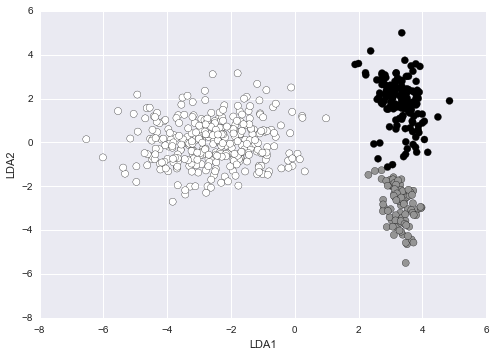

In [71]:
from sklearn.lda import LDA
X=df[acidlist]
y=df.region
sklearn_lda = LDA(n_components=2)
X_lda_sklearn = sklearn_lda.fit_transform(X, y)

plt.scatter(X_lda_sklearn[:, 0], X_lda_sklearn[:, 1], c=y, s=50)
plt.xlabel("LDA1");
plt.ylabel("LDA2");

In [72]:
dfnew=df[['eicosenoic', 'region', 'regionstring']]
dfnew['linoarch']=(0.969/1022.0)*df.linoleic + (0.245/105.0)*df.arachidic
dfnew.head()

,eicosenoic,region,regionstring,linoarch
0,0.29,1,South,0.007772
1,0.29,1,South,0.008828
2,0.29,1,South,0.006675
3,0.35,1,South,0.007689
4,0.46,1,South,0.008238


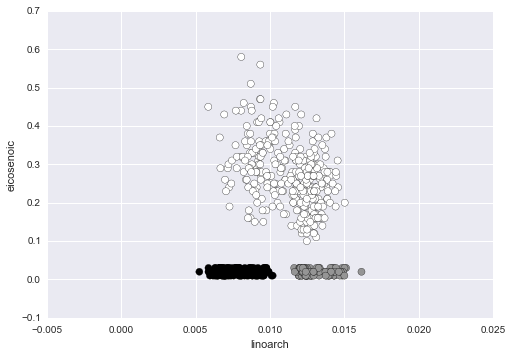

In [73]:
plt.scatter(dfnew.linoarch, dfnew.eicosenoic, c=dfnew.region, s=50)
plt.xlabel("linoarch")
plt.ylabel("eicosenoic");

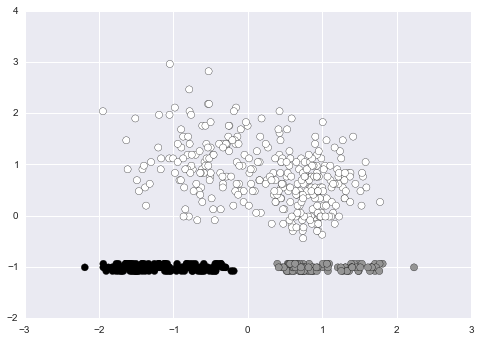

In [74]:
def standardize(l):
    return (l - l.mean()) / l.std()
plt.scatter(standardize(dfnew.linoarch), standardize(dfnew.eicosenoic), c=dfnew.region, s=50);

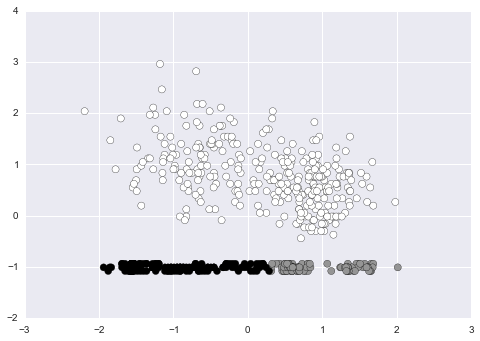

In [75]:
plt.scatter(standardize(df.linoleic), standardize(df.eicosenoic), c=df.region, s=50)

In [76]:
dfnosouth=df[df.regionstring!='South']
dfnosouth.head()

,areastring,region,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic,regionstring
323,Inland-Sardinia,2,5,11.29,1.20,2.22,72.72,11.12,0.43,0.98,0.02,Sardinia
324,Inland-Sardinia,2,5,10.42,1.35,2.10,73.76,11.16,0.35,0.90,0.03,Sardinia
325,Inland-Sardinia,2,5,11.03,0.96,2.10,73.80,10.85,0.32,0.94,0.03,Sardinia
326,Inland-Sardinia,2,5,11.18,0.97,2.21,72.79,11.54,0.35,0.94,0.02,Sardinia
327,Inland-Sardinia,2,5,10.52,0.95,2.15,73.88,11.26,0.31,0.92,0.01,Sardinia


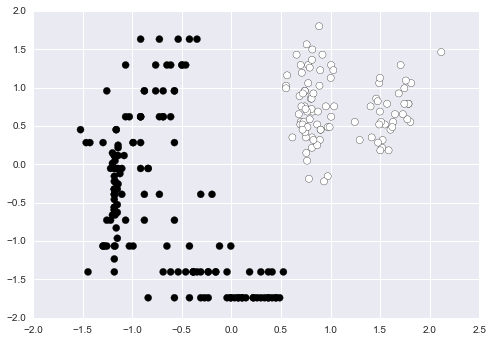

In [77]:
plt.scatter(standardize(dfnosouth.linoleic), standardize(dfnosouth.arachidic), c=dfnosouth.region, s=50);